# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение общей информации о данных

Для начала выведем несколько первых строк датасета и более подробно рассмотрим его структуру, а также выведем описательные статистики для переменных.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'C:\Users\dkiro\Desktop\проект\real_estate_data.csv', sep = '\t')
df.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


### Вывод

В датасете всего 23699 строк. Можно заметить, что в большинстве столбцов присутствуют пропуски (в некоторых столбцах процент пропусков существенный и даже больше половины: например, **pounds_nearest** или **parks_nearest**. Также можно отметить неподходящий тип данных для некоторых переменных: float вместо int, object вместо datetime и т.д. Кроме этого есть и аномальные значения переменных (маловероятно, что высота потолка может быть 100 метров). 

В следующем разделе мы займемся предобработкой данных, а именно:
1. Заполним пропуски медианным (нулевым) значением в переменных **ceiling_height, floors_total, balcony, ponds_around3000, parks_around3000, days_exposition**.
2. Для переменной **rooms** заменим значения 0 на 1.
3. Удалим строки с пропусками в **locality_name**
4. Поменяем тип данных с float на int для тех столбцов, где переменные могут быть целочисленными, а также поменяем тип переменной **first_day_exposition** с object на datetime.

## Предобработка данных

Начнем предобработку данных с заполнения пропусков в столбцах. Начнем со столбца **ceiling_height**. Начнем с того, что минимальное и максимальное значение высоты потолка в датасете - 1м и 100 м соответственно. Причем 75% значений высоты потока меньше 2.8м. Заполним пропуски в данных медианным значением 2.65

In [5]:
print('Пропусков до заполнения:', df.ceiling_height.isna().sum())
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
print('Пропусков после заполнения:', df.ceiling_height.isna().sum())

Пропусков до заполнения: 9195
Пропусков после заполнения: 0


В столбце **floors_total** намного меньше пропусков, всего 86. Заменим их на медианное значение 9 этажей без особого искажения переменной (в среднем действительно дома имеют 9 этажей). 

In [6]:
print('Пропусков до заполнения:', df.floors_total.isna().sum())
df['floors_total'] = df['floors_total'].fillna(df['floors_total'].median())
print('Пропусков после заполнения:', df.floors_total.isna().sum())

Пропусков до заполнения: 86
Пропусков после заполнения: 0


В стобце **balcony**, cкорее всего, пропущенные значения обозначают отсутствие балкона.

In [7]:
print('Пропусков до заполнения:', df.balcony.isna().sum())
df['balcony'] = df['balcony'].fillna(0)
print('Пропусков после заполнения:', df.balcony.isna().sum())

Пропусков до заполнения: 11519
Пропусков после заполнения: 0


В столбце **rooms** есть значения 0, что выглядит нереалистично. Заменим это значение на 1. 

In [8]:
df.loc[(df['rooms'] == 0, 'rooms')] = 1
len(df.query('rooms == 0'))

0

Удалим пропуски в столбце **locality_name**. Их всего 49, поэтому можно удалить без искажения результатов.

In [9]:
print('Пропусков до удаления:', df.locality_name.isna().sum())
df.drop(df[df['locality_name'].isna()].index, inplace=True)
print('Пропусков после удаления:', df.locality_name.isna().sum())

Пропусков до удаления: 49
Пропусков после удаления: 0


Рассмотрим столбцы **ponds_around3000** и **parks_around3000**. Можно заметить, что в них одинаковое количество пропусков. Проверим, связаны ли пропуски в этих двух стобцах с пропусками в столбцах **ponds_nearest** и **parks_nearest**.

In [10]:
print(len(df[~(df['parks_nearest'].isna()) 
             & (df['parks_around3000'].isna())]))

print(len(df[~(df['ponds_nearest'].isna()) 
             & (df['ponds_around3000'].isna())]))

0
0


Строки, в которых столбцы **ponds_around3000** и **parks_around3000** имеют пропуски, соответствуют строкам с пропусками в столбцах **ponds_nearest** и **parks_nearest**. Можно предположить, что пропуски в **ponds_around3000** и **parks_around3000** означают факт отсутствия пруда и парка рядом с домом и можно заменить пропуски на 0.

In [11]:
# Заполним нулем пропуски в стобце ponds_around3000
print('Пропусков до заполнения:', df.ponds_around3000.isna().sum())
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
print('Пропусков после заполнения:', df.ponds_around3000.isna().sum())

Пропусков до заполнения: 5510
Пропусков после заполнения: 0


In [12]:
# Заполним нулем пропуски в стобце parks_around3000
print('Пропусков до заполнения:', df.parks_around3000.isna().sum())
df['parks_around3000'] = df['parks_around3000'].fillna(0)
print('Пропусков после заполнения:', df.parks_around3000.isna().sum())

Пропусков до заполнения: 5510
Пропусков после заполнения: 0


Также заполним медианой пропуски в столбце **days_exposition**

In [13]:
print('Пропусков до заполнения:', df.days_exposition.isna().sum())
df['days_exposition'] = df['days_exposition'].fillna(df.days_exposition.median())
print('Пропусков после заполнения:', df.days_exposition.isna().sum())

Пропусков до заполнения: 3180
Пропусков после заполнения: 0


In [14]:
df = df.reset_index(drop = True) # меняем индексацию таблицы, поскольку мы удаляли некоторые строки из датафрейма

 Мы заполнили пропуски в некоторых основных столбцах, однако во многих других столбцах по-прежнему много пропусков. Например, в столбцах **parks_nearest**, **ponds_nearest**, **days_exposition** и тд. Для этих столбцов трудно придумать осмысленное заполнение пропусков, поскольку медианное или среднее значение могут сильно исказить результат. Оставим эти столбцы с пропусками и запомним про это. В любом случае pandas умеет обрабатывать данные с пропусками.
 
Теперь необходимо изменить тип данных в некоторых столбцах. Начнем с изменения типа float на int там, где это возможно. 

In [15]:
vars_to_int = [
    'floors_total', 'balcony', 'parks_around3000',
    'ponds_around3000', 'days_exposition',
]

In [16]:
df[vars_to_int] =  df[vars_to_int].astype('int')

Теперь изменим тип данных для столбца **first_day_exposition** с object на datetime.

In [17]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'],
                                            format = '%Y-%m-%dT%H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int32         
 7   living_area           21752 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          2760 non-null   object        
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          21381 non-null  float64       
 13  balcony         

### Вывод

После предобработки данных датасет содержит 23650 строк. В большинстве переменных пропуски в данных были заменены либо на медианное значение, либо на 0 (там где это было осмысленно). Тем не менее в некоторых столбцах, таких как **is_apartment**, **ponds_nearest** и т.д. по-прежнему присутствуют пропуски из-за того, что для этих переменных трудно придумать адекватный заменитель, который бы не сильно исказил значения. Было принято решение оставить пропуски в данных, поскольку pandas способен обрабатывать датасет и с наличием пропусков. Также, где это было возможно, тип данных был изменен с float на int и с object на datetime.

## Добавление новых переменных

На данном шаге необходимо создать переменные, которые будут полезны для дальнейшего анализа. Добавим в таблицу столбец, в котором будет указана цена квадратного метра жилья (как отношение цены дома к общей его площади).

In [18]:
df['price_per_square'] = df['last_price'] / df['total_area'] 

Далее создадим три столбца, в которых будут находиться соответственно день недели, месяц и год публикации объявления

In [19]:
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday
df['month_exposition'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year


Создадим столбец, в котором будет указан этаж квартиры: первый, последний или другой.


In [20]:
def floor(row):
    floors_total = row['floors_total']
    floor = row['floor']
    
    if floor == 1:
        return 'Первый'
    elif floor == floors_total:
        return 'Последний'
    else:
        return 'Другой'
    
df['floor_new']  = df.apply(floor, axis = 1)


И наконец создадим две переменные: соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [48]:
df['living_to_total'] = round(df['living_area'] / df['total_area'], 2)
df['kitchen_to_total'] = round(df['kitchen_area'] / df['total_area'], 2)

df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square,weekday_exposition,month_exposition,year_exposition,floor_new,living_to_total,kitchen_to_total
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,2,755.0,95,120370.370370,3,3,2019,Другой,0.47,0.23
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,NaN,...,0,NaN,81,82920.792079,1,12,2018,Первый,0.46,0.27
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,NaN,...,2,574.0,558,92785.714286,3,8,2015,Другой,0.61,0.15
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,1,48.0,121,100000.000000,1,6,2018,Другой,0.32,0.41
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,NaN,...,0,NaN,55,95065.789474,0,9,2018,Другой,0.47,0.30


### Вывод

Мы добавили в таблицу целых 7 новых столбцов. Если внимательно на них посмотреть, то можно отметить, что столбцы выведены корректно (верно выведены месяц, неделя, год, этаж и тп). Также нужно отметить, что в столбцах **living_to_total** и **kitchen_to_total** есть пропуски в связи с тем, что в столбцах **kitchen_area** и **living_area также** есть пропуски.  

##  Исследовательский анализ данных

Начнем с построения гистограмм для каждой из следующих переменных: площадь, цена, число комнат, высота потолков. Для этого построим функцию, которая будет в зависимости от датафрейма строить графики (эта функция понадобится нам еще в конце).

In [23]:
def histplots(name):  
    features = [[name['total_area'],
                 name['last_price']],
                [name['rooms'], name['ceiling_height']]]
    names = [['total_area','last_price'],['rooms','ceiling_height']]
    figure, ax = plt.subplots(2, 2, figsize = (10, 10)) 

    for i in range(2):
        for j in range(2):
            # Cтроим range для гистограмм на основе IQR 
            IQR = features[i][j].quantile(0.75) - features[i][j].quantile(0.25)
            min_range = features[i][j].quantile(0.25) - 1.5 * IQR
            max_range = features[i][j].quantile(0.75) + 3 * IQR
            ax[i, j].hist(features[i][j], bins = 10, range = (min_range, max_range)) 
            ax[i, j].set_title('Histogram of ' + names[i][j])


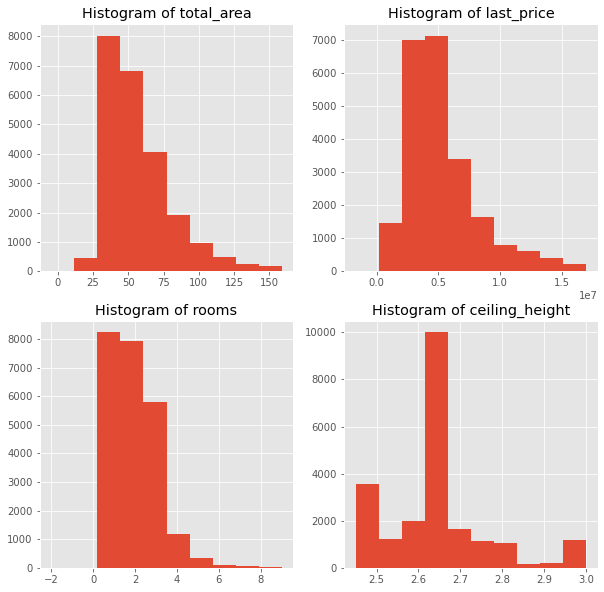

In [25]:
histplots(df)

Выше мы построили гистограммы для 4 выбранных переменных, при этом ограничив нижнюю ось с помощью IQR, чтобы в гистограммах не было выбросов. Исходя из гистограмм можно отметить, что в основном наибольшее количество наблюдений для переменной **total_area** лежит в пределах примерно от 25 до 75 метров квадратных, для **last_price** - от 2,5 млн до 8 млн, для **rooms** - от 1 до 3 комнат, для **ceiling_height** - рт 2,5 до 2,8 метров. Также можно отметить правостороннюю скошенность для первых трех переменных, т.е. хвост распределения расположен в сторону больших значений. Также на гистограмме для **ceiling_height** виден очень яркий пик в районе от 2,6 до 2,7. Это связано с тем, что мы в самом начале заполняли пропуски в этой переменной медианой, которая равна 2,65. 

Изучим время продажи квартиры (переменная **days_exposition**).

Среднее время продажи квартиры: 169.22274841437633
Медианное время продажи квартиры: 95.0


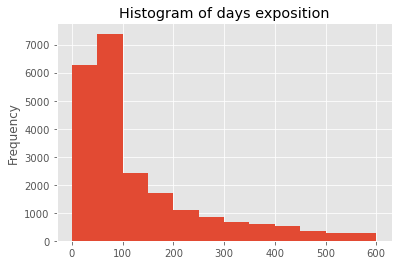

In [26]:
df['days_exposition'].plot(kind = 'hist',
                           bins = 12,
                           range = (0, 600),
                           title = 'Histogram of days exposition');

print('Среднее время продажи квартиры:', df['days_exposition'].mean())
print('Медианное время продажи квартиры:', df['days_exposition'].median())

В глаза сразу бросается огромная разница между медианой и средним для времени продажи квартиры - почти в два раза. Это говорит о том, что в переменной находятся выбросы значительно больше среднего и медианного значения. Об этом также говорит и сам график, точнее его скошенность вправо - слишком много располагается на правом хвосте распределения.

Судя по гистограмме можно сказать, что в большинстве случаев квартиру продают в срок до 100 дней. Как минимум половина людей смогли продать квартиру не позднее, чем за 3 месяца (95 дней - медианное значение). Чтобы понять, какие продажи можно считать слишком долгими, а какие наоборот - слишком быстрые, обратимся к диаграмме ящик с усами (boxplot).

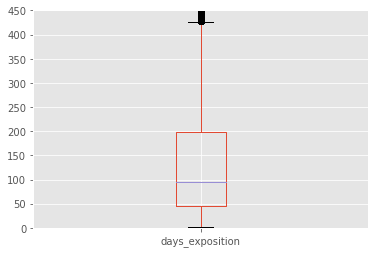

In [27]:
df['days_exposition'].plot(kind = 'box',
                           ylim = (0, 450),
                           grid = True);

Из диаграммы видно, что значения больше примерно 425 являются выбросами и их можно считать "слишком долгими" продажами. Выбросов со слишком маленькими значениями нет, поэтому условно за границу "слишком быстрых" продаж середину интервала от 0 до Q3 (3-й квартиль), т.е. примерно 25. Все что ниже этого значения можно считать слишком быстрой продажей квартиры.

Удалим выборосы в переменных. Удалять их будем, основываясь на межквартильном разбросе (как в диграмме ящик с усами), т.е. выбросами будут считаться любые значения, не принадлежащие интервалу (Q1-1.5*IQR;Q3+2*IQR). В данном случае можно чуть-чуть подвинуть правую границу, чтобы не удалилось слишком много наблюдений.

Для того чтобы не проводить одно и то же действие много раз, напишем код функции, которая бы автоматически удаляла бы лишние строки из датасета.

In [28]:
def cutfunc(column):
    """
    Функция выводит количество строк в датасете
    после удаления выбросов 
    
    """
    global df
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    min_val = Q1 - 1.5*IQR
    max_val = Q3 + 2*IQR
    df = df[(df[column] >= min_val) 
            & (df[column] <= max_val)
            | (df[column].isna())] 
    
    return len(df) 

Поскольку для анализа нам нужны не все переменные в датасете, будем удалять выбросы только для тех количественных переменных, которые нам понадобятся в дальшейнем, а именно: цена, общая площадь, число комнат, высота потолков, удаленность от центра. Воспользуемся нашей функцией cutfunc и удалим строки с выбросами.

In [29]:
cutfunc('rooms'), cutfunc('last_price'), cutfunc('total_area')


(23619, 22080, 21828)

Видно, что уже из таблицы удалилось больше 5% строк. Если использовать эту функцию для переменных **высота потолков** и **удаленность от центра**, то удалится еще больше строк и мы потеряем много данных. Для оставшихся двух переменных поступим по-другому. Например, можно предположить, что высота потолков не меньше 2 метров и не больше 4, а расстояние до центра не больше 40км. Тогда получим следующее:

In [30]:
df = df.query('2 < ceiling_height < 4')
df = df[(df['cityCenters_nearest'] < 40000) | (df['cityCenters_nearest'].isna())]
len(df)

21460

Мы удалили почти 10% наблюдений. Это вынужденная мера, поскольку в противном случае выбросы могли бы сильно исказить итоговые результаты.

Теперь рассмотрим, как факторы, которые мы анализируем, вляют на цену жилья. Для начала изучим взаимосвязь между ценой и общей площадью дома. Базовое предположение: цена квартиры увеличивается с ростом площади. Напишем функцию, которая будет строить диаграмму рассеивания, где по вертикальной оси будет отложена цена, а по горизонтальной  - выбранная переменная. Параметры функции - датафрейм и название переменной.  

In [31]:
def scatterplot(name, xvar):
    plt.scatter(name[xvar], name['last_price'], marker = '.');
    plt.ylabel('Last price')
    plt.xlabel(xvar)

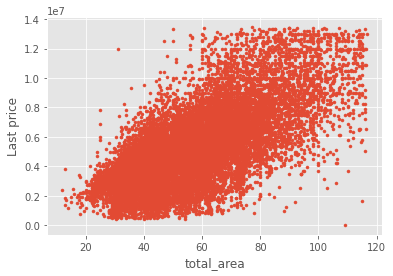

In [32]:
scatterplot(df, 'total_area')

Как мы и предполагали, на рисунке видна прямая зависимость между общей площадью жилья и его ценой. Точки вытянуты вдоль диагонали от левого нижнего до правого верхнего угла. График представляет собой скорее облако точек, нежели прямую линию, что говорит о хорошей, но не 100%-й корреляции между переменной. Наблюдаются также некоторые точки, выбивающиеся из облака: например, где общая площадь большая, а цена наоборот низкая. Возможно такая недвижимость находится не в самом лучшем состоянии, либо соотношение жилой площади по отношению к общей низкое. 

Далее построим такую же диаграмму рассеивания, чтобы посмотреть на взаимосвязь между ценой жилья и его расстоянием до центра.

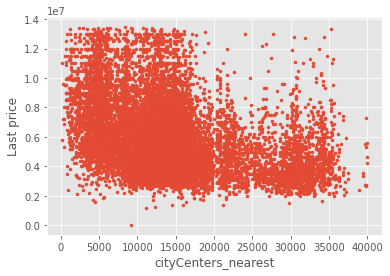

In [33]:
scatterplot(df, 'cityCenters_nearest')

Этот график уже сильно отличается от предыдущего. Тут нельзя сказать, что, например, жилье рядом с центром будет обязательно дорогим, а далекое от центра - наоборот очень дешевым. Тут скорее можно разбить данные на три кластера: 
1. Квартиры с расстоянием до центра от 0 до примерно 17 км. В данном кластере есть как очень дешевые квартиры, так и очень дорогие. Связано это скорее всего с тем, что в центре города и рядом с ним могут находиться как очень качественные квартиры в районах с развитой инфраструктурой, так и некачественное жилье (например, коммуналки). 
2. Квартиры с расстоянием до центра от 17 до 35 км. Здесь дорогих квартир уже на порядок меньше. Оно и понятно, потому что многие люди, живущие на окраинах, работают в центре города и рядом. Кроме этого инфраструктура районов на окраинах слабо развита. Соответственно, стоимость такого жилья намного меньше, чтобы компенсировать неудобство жильцам. 
3. Квартиры с расстоянием до центра больше 35 км. Таких наблюдений немного, но четко видно, что в основном это недорогие квартиры от 200 до 800 тыс. рублей. Причины такой цены те же, что в для 2-го кластера. 

Теперь рассмотрим заивисмость цены квартир от таких факторов, как количество комнат, этаж квартиры и дата размещения объявления (день недели, месяц, год). Чтобы не писать один и тот же код 10 раз, напишем функцию, которая будет строить график типа bar по сводной таблице. В ней будет всего две колонки - исследуемая переменная и средняя для каждой группы. 

In [34]:
def barplot(name, column):
    name = pd.pivot_table(name,
                          index = column,
                          values = 'last_price',
                          aggfunc = 'mean')
    
    name.columns = ['last_price']
    name.last_price = name.last_price / 1000000 # считаем в млн. рублей
    
    return name.plot(kind = 'bar');

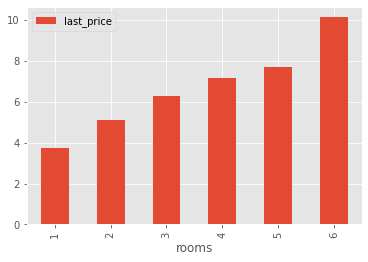

In [35]:
barplot(df, 'rooms') # зависимость цены от числа комнат, млн рублей.

Довольно очевидно, что с увеличением комнат цена квартиры растет. При этот на графике выше видно, что если с 1 по 5 комнату цена квартиры растет примерно одним и тем же темном, то средняя цена квартиры с 6 комнатами существенно выше, чем с 5 комнатами.

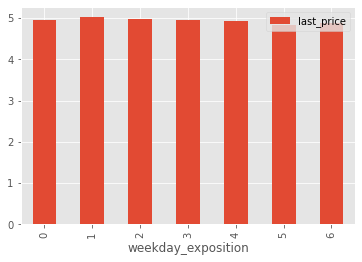

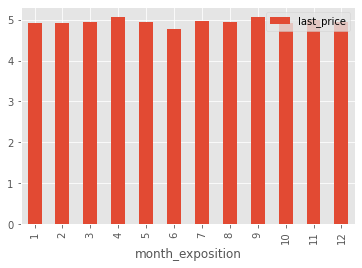

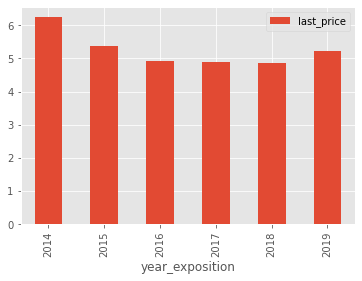

In [36]:
# Зависимость цены от дня недели, месяца и года размещения объявления соответственно, млн рублей.
barplot(df, 'weekday_exposition')
barplot(df, 'month_exposition')
barplot(df, 'year_exposition')


Тут можно отметить, что средняя цена квартиры не зависит ни от дня нидели, ни от месяца размещения объявления о продаже квартиры. Цена меняется в пределах погрешности. Зато можно отметить, что в 2014 году люди продавали свои квартиры дороже, чем в последуюшие годы. После 2014 года стоимость квартир несколько упала и с 2016 года остановилась на примерно одном и том же уровне.

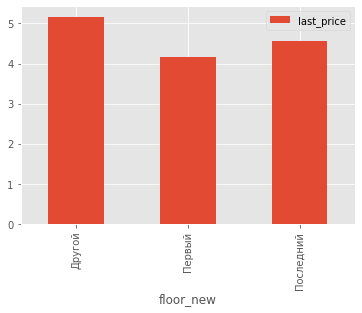

In [37]:
barplot(df, 'floor_new') # зависимость цены от этажа, млн рублей.

Средняя цена квартир на первом и последнем этаже примерно на 500 тыс. ниже, чем на других этажах. Возможно, людям не нравятся эти этажи. Первый этаж не нравится людям, потому что слышно много шума с улицы. Последний - потому что долго добираться на лифте. 

Теперь рассмотрим 10 населенных пунктов с наибольшим количеством объявлений о продаже квартир и рассчитаем в них среднюю стоимость жилья. 

In [38]:
cities = df.locality_name.value_counts().head(10)

df_1 = df.query('locality_name in @cities.index')
top10_cities_price = pd.pivot_table(df_1,
                                    index = 'locality_name',
                                    values = 'last_price',
                                    aggfunc = 'mean')

column_name = 'last_price, mln rub'
top10_cities_price.columns = [column_name]
top10_cities_price[column_name] = top10_cities_price[column_name] / 1000000 
top10_cities_price.sort_values(by = column_name, ascending = False)


,"last_price, mln rub"
locality_name,
Санкт-Петербург,5.807428
Пушкин,5.378236
посёлок Парголово,4.477609
деревня Кудрово,4.234158
посёлок Шушары,4.079352
Колпино,3.853986
Всеволожск,3.698813
посёлок Мурино,3.673096
Гатчина,3.408440


Предсказуемо, в Санкт-Петербурге средняя цена самая высокая среди всех населенных пунктов, следом идут Пушкин и поселок Парголово. Самая низкая стоимость в Выборге. Чуть дороже квартиры стоят в Гатчине и поселке Мурино.

Посчитаем среднюю цену квартир в Санкт-Петербурге в зависимости от расстояния до центра (для каждого километра). 


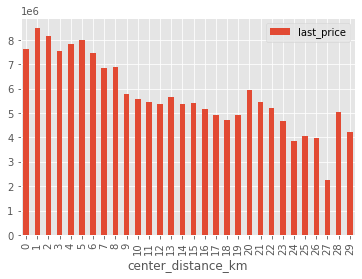

In [39]:
spb = df.query('locality_name == "Санкт-Петербург"')
spb['center_distance_km'] = (spb['cityCenters_nearest'] / 1000).round(0)
spb['center_distance_km'] = spb['center_distance_km'].astype('Int64')

mean_price = pd.pivot_table(spb,
                            index = 'center_distance_km',
                            values = 'last_price',
                            aggfunc = 'mean') 

mean_price.plot(y = 'last_price', kind = 'bar')


На графике показана средняя стоимость квартиры (в млн. руб) в зависимости от удаленности от центра. После 8 км средняя цена жилья резко сокращается. Можно сделать вывод, что 8 км - это и есть граница центра.

Теперь проанализируем сегмент квартиры в центре. Начнем с параметров: цена, площадь, число комнат и высота потолков. 
Создадим датафрейм с данными о квартирах в центре (до 8 км). Воспользуемся функцицей histplots(spb_center) для построения гистограмм исследуемых переменных.

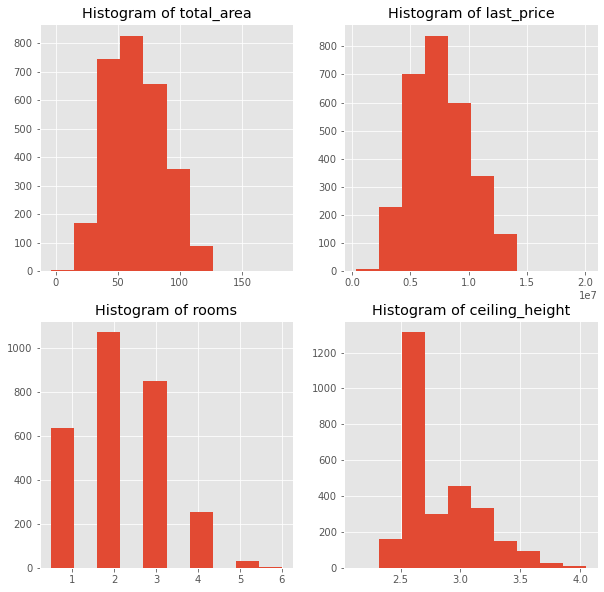

In [40]:
spb_center = spb[spb['center_distance_km'] <= 8]
histplots(spb_center)

На гистограммах видно, что распределение цены и площади почти похоже на нормальное распределение. Площадь в основном лежит в пределах пределах от 50 до 75 кв. км, а цена - от 5 до 10 млн. Большинство квартир - двух/трехкомнатные. Переменная высота потолков имеет большой пик в районе от 2.5 до 2.7 метров из-за того, что мы в самом начале заполнили данные медианой. Если бы мы оставили пропущенные значения, то в целом распределения переменной было бы похоже на нормальное со средним в районе 3 метров. 

Далее рассмотрим, как переменные (число комнат, этаж, удалённость от центра, дата размещения объявления) влияют на цену жилья. Воспользуемся функциями scatterplot и barplot.

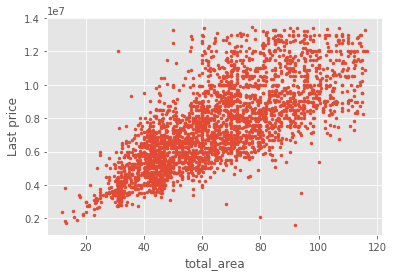

In [41]:
scatterplot(spb_center, 'total_area')

Как и в случае с данными по всем населенным пунктам, зависимость между площадью и ценой прямая, что выражается в вытянутости облака точек из левого нижнего угла до правого верхнего. Здесь разве что это более выражено.

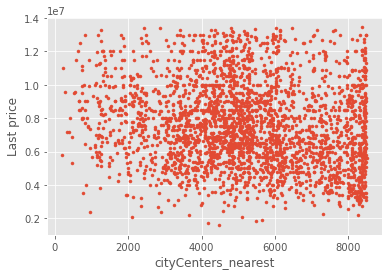

In [42]:
scatterplot(spb_center, 'cityCenters_nearest')

На графике выше нельзя сказать, что наблюдается какая-то зависимость, потому что точки распределены практически по всему графику. Это можно объяснить тем, что в центре могут быть как и плохие дешевые квартиры, так и хорошие дорогие.

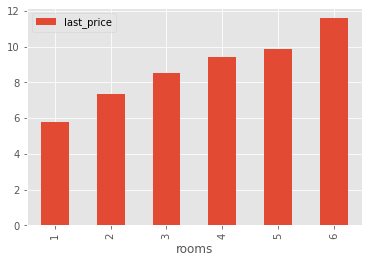

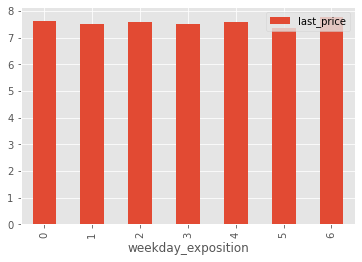

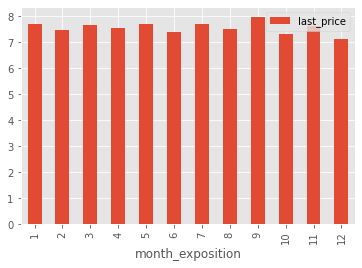

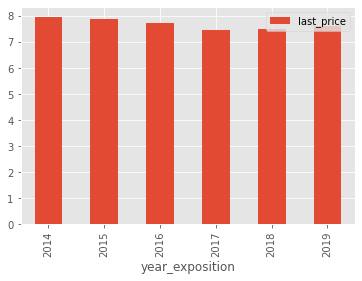

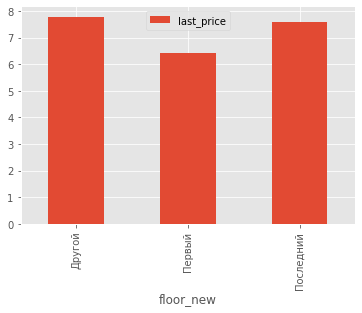

In [43]:
barplot(spb_center, 'rooms')
barplot(spb_center, 'weekday_exposition')
barplot(spb_center, 'month_exposition')
barplot(spb_center, 'year_exposition')
barplot(spb_center, 'floor_new')

Влияние числа комнат, даты размещения и этаж квартиры влияют на цену практически также, как и в целом по датасету: с увеличение числа комнат приводит к росту цены на квартиру, день недели и месяц не влияют на цену. Разница в том, что в отличии от всех остальных населенных пунктов, в центре Питера первый этаж стоит дешевле чем все остальные, а средняя цена практически не зависит от года размещения объявления.

Постоим аналогичные графики для всего питера в целом и сравним полученные результаты.

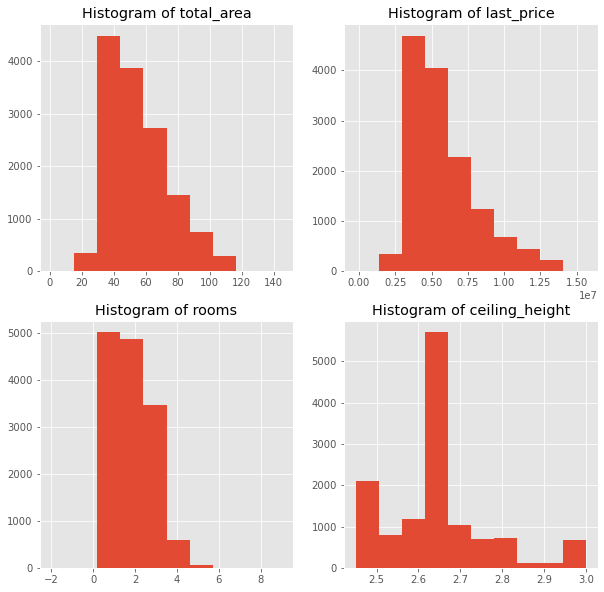

In [44]:
histplots(spb)

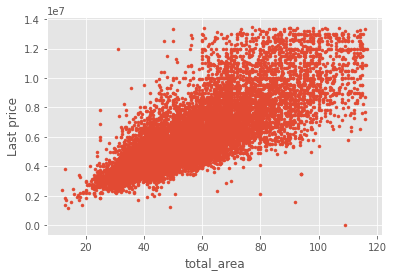

In [45]:
scatterplot(spb, 'total_area')

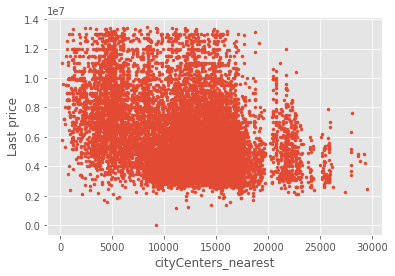

In [46]:
scatterplot(spb, 'cityCenters_nearest')

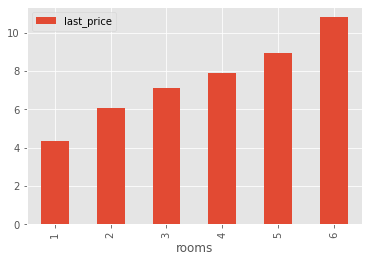

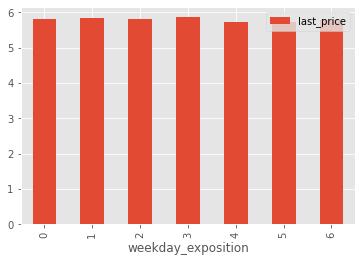

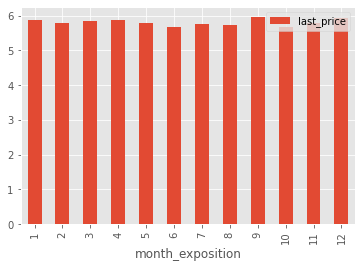

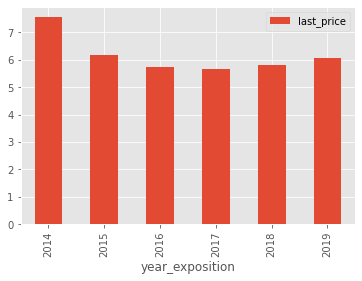

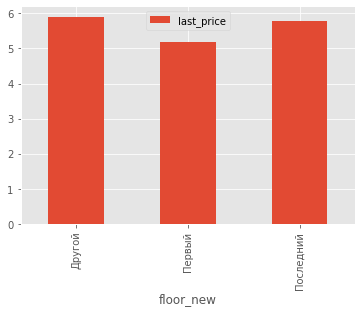

In [47]:
barplot(spb, 'rooms')
barplot(spb, 'weekday_exposition')
barplot(spb, 'month_exposition')
barplot(spb, 'year_exposition')
barplot(spb, 'floor_new')

## Выводы
Мы проанализировали основные переменные, которые могут оказывать влияние на цену квартир: площадь, количество комнат, высота потолков и т.д. В основном распределения этих переменных далеки от нормальных. Также мы выяснили, что в среднем люди тратят около 3 месяцев на то, чтобы продать квартиру. Были удалены выбросы и аномальные значения (в основном благодаря IQR правилу), при этом датасет сократился почти на 10%, что было вынужденной мерой. Затем мы проанализировали топ-10 населенных пунктов по количеству объявлений и посчитали среди них среднюю цену квартир: лидером стоимости стал предсказуемо СПБ, наименьшая же стоимость наблюдалась в Выборге. 

Основным результатом на данном шаге было выявление зависимостей между ценой и такими параметрами, как общая площадь, расстрояние до центра, этаж квартиры. Некоторые параметры, такие как месяц и день недели даты размещения не оказывают влияния на цену. В сегментре квартир в центре выявлены аналогичные взаимосвязи, хотя и со своими особенностями (например, 1-й этаж стоит меньше чем все остальные). **Если же брать данные по СПБ в целом, то он повторяет практически один в один результаты, которые мы получили для всего датасета (потому что данные из Питера составляют практически половину всего датасета).**


## Общий вывод

Итак, мы проанализировали данные об объявлениях о продаже квартир в Санкт-Петербурге и соседних населенных пунктов. Сначала мы очистили датафрейм от пропусков, заменив их медианными значением или нулем в зависимости от смысла переменной. Также был изменен тип данных для некоторых переменных (с float на int, с object на datetime). Были добавлены новые столбцы (день недели продажи объявления, этаж, цена за кв. м и тп). 

Кроме этого мы удалили выбросы и аномальные значения с помощью IQR правила. И самый главный итог работы - мы проанализировали выбранные переменные и выяснили, какие из них влияют на стоимость квартиры, а какие - нет, причем сделано это было для всего датасета в целом, только для Санкт-Петербурга и только для центра Санкт-Петербурга. Более подробно полученные результаты можно посмотреть в разделе **выводы** на шаге 1. В целом результат был ожидаемый и такие переменные, как площадь, расстояние до центра и количество комнат существенно влияют на цену квартир. Остальные переменные либо не оказывают никакого влияния вообще (например, месяц размещения объявления), либо оказывают незначительное (этаж).